   <h1>Проект. Анализ рынка игровой индустрии</h1>

<h2>Описание проекта</h2>


Интернет-магазин «Стримчик», продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Задча - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<h2>накомство с датасетом</h2>

**Импорт библиотек**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from scipy import stats as st

In [4]:
data = pd.read_csv('/datasets/games.csv')

**Вывод таблицы**

In [5]:
data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Вот и наша таблица**

Уже вижу много проблем с ней, предстоит их устранить

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Что не так**

- Название столбцов не придерижваются одного стиля - итог, неудобно обращаться с столбцам, могут возникнуть ошибки из-за человеческого фатора
- Неправильный тип данных, например год выхода - итог, можно прийти к ошибке в подсчетах, а float занимает больше места, чем int хроня год
- Очень много пропусков - итог - результаты анализа могут и скорее всего будут искожать действительность


<h2>Предобратка данных</h2>

Для дальнейшего анализа приведем датасет в порядок, устраним то, о чем я писал выше

**3.1 Название столбцов**

In [7]:
data.rename(columns = {'Name':'name', 'Platform':'platform' ,'Year_of_Release':'year_of_release',
                       ' other_sales':'other_sales','Critic_Score':'critic_score','User_Score':'user_score',
                       'Genre':'genre', 'Rating':'rating'}, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Столбцы переименованы, займемся пропусками

**3.2 Пропуски**

In [8]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,Other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Эти 2 строчки можно удалить, по ним сложно сказать, что за игра. На результат уделение 2 строков никак не повлияет

In [10]:
data = data.dropna(subset = ['name'])

In [12]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,Other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


269 строк мы тоже можем удалить, однако зачастую игры выходят не на одну платформу, а сразу на несколько, правда, в настоящее время не всегда в один год, бывает с разницой в несколько лет. 

Выходит, даже если дать пропускам значения выхода на другую платформу, можно встретить те игры, где только 1 платформа, а можно встретить, где год выхода разный. Я принял решение удалить эти строки, тк удаление или частичное восстановление этих строк не изменят результаты итога, эти строки занимают слишком малый процент от всего датасета

In [13]:
data = data.dropna(subset = ['year_of_release'])
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Что касается пользовательских оценок и оценок критиков, то их однозначно удалять нельзя. Но и заменить на медианные или средние нельзя, тк не факт, что игры работают одинаково на всех платформах. Заменить на другое значение тоже не вариант, если это сделать, но собьются графики распределений по оценкам, а боксплот покажет много значений, например -1, если мы заменим на это значение

Думаю, оставим так



На первый взгяд, в датасете много значений  TBD (to be determined = будет определено). Проверю

In [14]:
len(data[data['user_score'] == 'tbd'])/len(data)

0.14449039163220628

Так и есть, заменим на пропуск

In [25]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Теперь за типы данных. Еще раз взглянем выше

**3.2 Типы данных**

In [17]:
data['user_score'] = data['user_score'].astype('float')
data['year_of_release'] = data['year_of_release'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   NA_sales         16444 non-null  float64
 5   EU_sales         16444 non-null  float64
 6   JP_sales         16444 non-null  float64
 7   Other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**3.4 Дубликаты**

Посмотрим какие значения принимают данные

In [18]:
data.duplicated().sum()

0

In [19]:
sorted(data['platform'].unique())

['2600',
 '3DO',
 '3DS',
 'DC',
 'DS',
 'GB',
 'GBA',
 'GC',
 'GEN',
 'GG',
 'N64',
 'NES',
 'NG',
 'PC',
 'PCFX',
 'PS',
 'PS2',
 'PS3',
 'PS4',
 'PSP',
 'PSV',
 'SAT',
 'SCD',
 'SNES',
 'TG16',
 'WS',
 'Wii',
 'WiiU',
 'X360',
 'XB',
 'XOne']

In [20]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [21]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Неявных дубликатов тоже нет

In [22]:
len(data['name'].value_counts())


11426

In [23]:
len(data['name'].str.lower().value_counts())

11426

In [24]:
duplicates = data.groupby(['name', 'platform', 'year_of_release']).agg('size').reset_index(name='count')
duplicates[duplicates['count']> 1]

,name,platform,year_of_release,count
7652,Madden NFL 13,PS3,2012,2


Вот наш неявный дубликат

In [23]:

data.shape[0]

16444

In [24]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'])
data.shape[0]

16443

**3.5 Диапазоны значений**

Осталось посмотреть, в каких пределах лежат числовые значения, может тут есть неправдоподобные значения

In [26]:
data['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

Правый край равен 2016, это верно, так и должно быть. Остальные значения выглядят нормально

In [27]:
data['NA_sales'].describe()

count    16444.000000
mean         0.264012
std          0.818378
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: NA_sales, dtype: float64

In [28]:
data['EU_sales'].describe()

count    16444.000000
mean         0.145930
std          0.506716
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: EU_sales, dtype: float64

In [29]:
data['JP_sales'].describe()

count    16444.000000
mean         0.078487
std          0.311100
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: JP_sales, dtype: float64

In [30]:
data['Other_sales'].describe()

count    16444.000000
mean         0.047594
std          0.188005
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: Other_sales, dtype: float64

По продаж тоже все правдободобно, без аномалии

In [31]:
data['critic_score'].describe()


count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [32]:
data['user_score'].describe()

count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

Все выглядит неплохо, можно заметить, что критики оценивают по 100 балльной шкале, можно точно убедиться, что все так оценивают и нет оценки 10 балльной шкале по мин. показателю равному 13. А пользователь оценивают по 10 балльной. Анологично, в подтверждение этому - макс. 9.7

**Итог**

- Столбцы переименованы и имееют один общий стиль названия
- Тип данных изменен 
- Где можно было, устранены пропуски, если нет - объясненно по какой причине нет
- Дубликатов не обнаруженно
- Значения правдоподобны, аномалии не обонаружены

In [33]:

# Посмотрим, что осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   NA_sales         16444 non-null  float64
 5   EU_sales         16444 non-null  float64
 6   JP_sales         16444 non-null  float64
 7   Other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
name : кол-во NaN 0 , процент NaN 0.0 %
-------

In [34]:
data['rating'] = data['rating'].fillna('Unknown')
data['rating'].value_counts()

Unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
RP            1
AO            1
Name: rating, dtype: int64

колонку с общими продажами созданию ниже

<h2>Исследовательский анализ данных</h2>

Посотрим как много игр выходило по годам

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


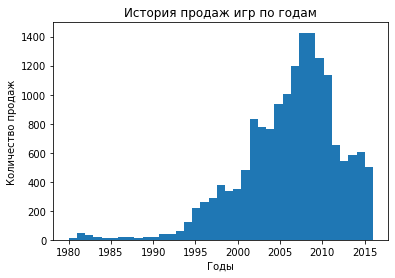

In [35]:
display(data.groupby('year_of_release').agg({'name':'count'}))

ax = data['year_of_release'].plot(kind='hist', bins=37,)

ax.set_xlabel('Годы')
ax.set_ylabel('Количество продаж')
ax.set_title('История продаж игр по годам')

plt.show()

сделано

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Для этого найдем общие продажи для каждой игры, суммируя продажи всех регионов

In [36]:
data['total_sales'] = data['NA_sales'] + data['EU_sales'] + data['JP_sales'] + data['Other_sales']

In [37]:
data.head()

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,Other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


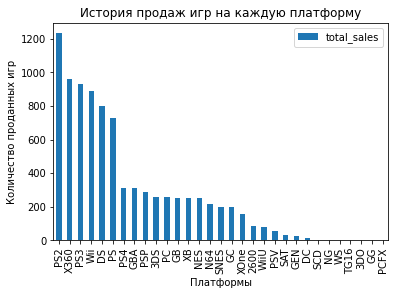

In [38]:
platform_sales = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False).plot(kind='bar')
platform_sales.set_xlabel('Платформы')
platform_sales.set_ylabel('Количество проданных игр')
platform_sales.set_title('История продаж игр на каждую платформу')
plt.show()

Вот и наш список платформ с самыми большими продажами игр. Разберемся детальнее

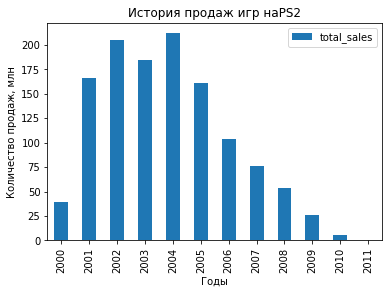

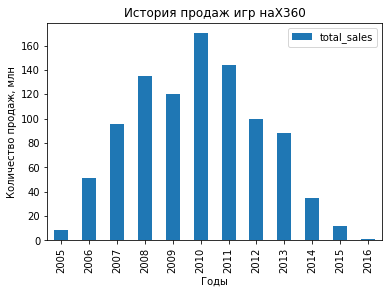

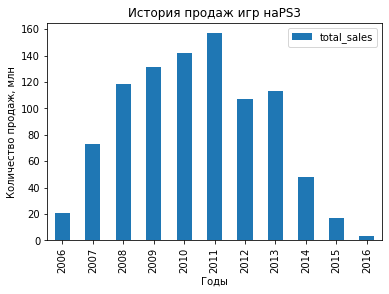

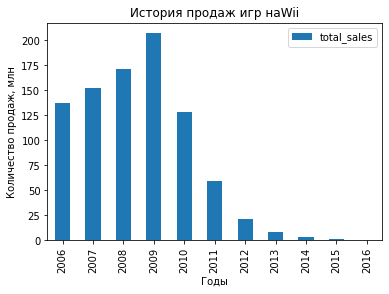

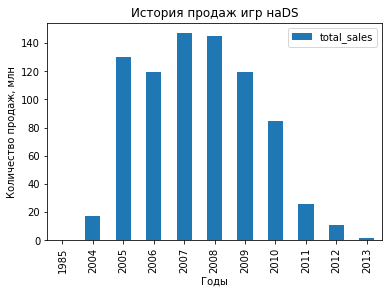

In [39]:
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

for i in platforms:
    ax_platforms = data.query('platform == @i').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
    ax_platforms.set_xlabel('Годы')
    ax_platforms.set_ylabel('Количество продаж, млн')
    ax_platforms.set_title('История продаж игр на' + i)
    plt.show()
    






По графику видно, что продажи начали идти с 2000г, когда вышла сама консоль, а ближе к 11 идет на спад.

у xbox360 продажи шли с 2005 по 2016, довольно большой диапазон для консоли

PS3 начинает диапазон с 2006, примерно с этой точки и падают продажи на PS2, что логично, в 2016 почти нет продаж

У Wii диапазон продаж такой же, как у 3 плойки. Но график находится в основном в правой части, значит изнчально продажи были сильно выше, чем

In [40]:
data[(data['platform'] == 'DS') & (data['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,Other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,Unknown,0.02


ошибочная строка, удалим ее

In [41]:
data = data.drop(15957)

In [42]:
data[(data['platform'] == 'DS') & (data['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,Other_sales,critic_score,user_score,rating,total_sales


Ошибка утранена. Сама DS пользовалась спросом с 2004 по 2008, а к 2012 практический полностью его потеряла

**Жизненый цикл платформ**

Как видно по графикам, в среднем продажи растут и находятся в топе в течении 7 лет. Столько и составляет жизненный цикл основных консолей PS и XBOX

In [43]:

temp = data.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

**Какие платформы лидируют по продажам, растут или падают? **

Для проверки этой задачи и для последующих, на результате которых мы сможем сделать вывод о успехах новых игр, я возьму только данные за последние 3 года. Старые данные нас не интересуют, рассматриваем с 2014года

In [44]:
new_data = data.query('year_of_release >= 2014').copy()

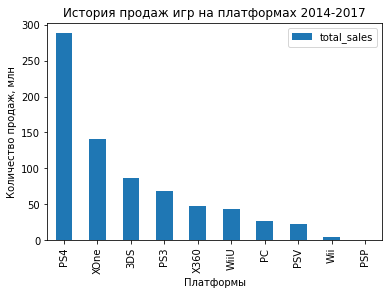

In [45]:
platform_sales_fresh = new_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False).plot(kind='bar')

platform_sales_fresh.set_xlabel('Платформы')
platform_sales_fresh.set_ylabel('Количество продаж, млн')
platform_sales_fresh.set_title('История продаж игр на платформах 2014-2017')
plt.show()

**Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.**

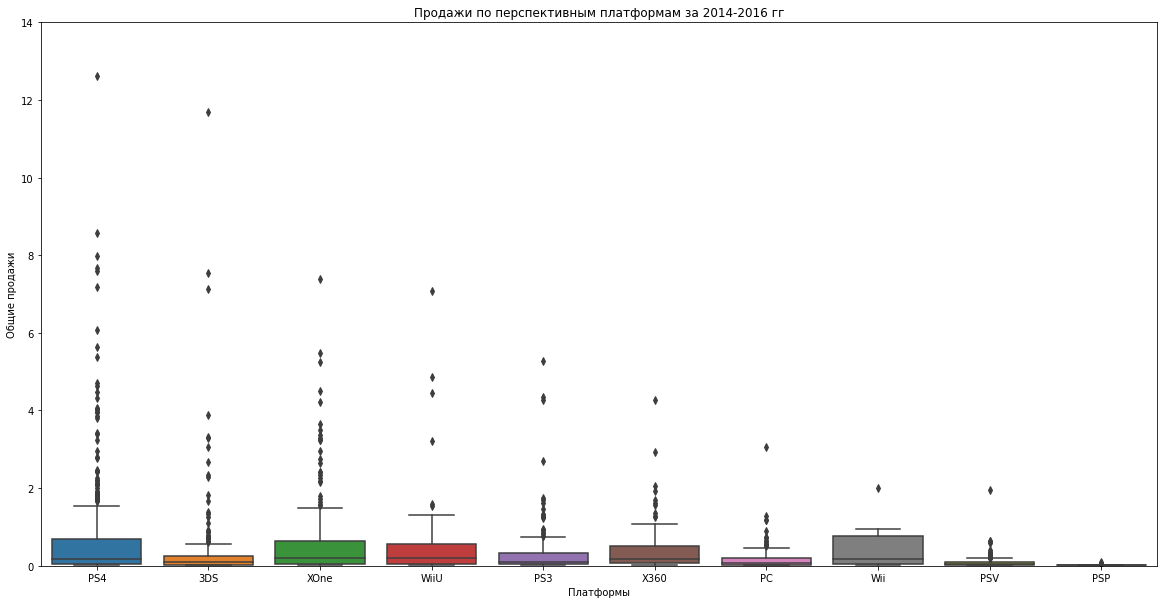

In [46]:
fig = plt.figure(figsize = (20,10))
sb.boxplot(data = new_data, y = 'total_sales', x='platform').set(title = 'Продажи по перспективным платформам за 2014-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 14))
plt.show()

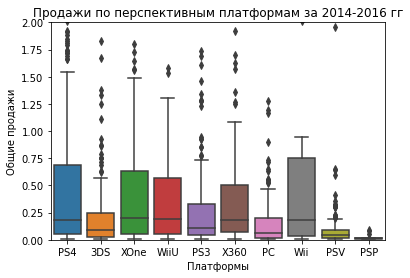

In [47]:
sb.boxplot(data = new_data, y = 'total_sales', x='platform').set(title = 'Продажи по перспективным платформам за 2014-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 2))
plt.show()

Лидируют ps4 и xbox one, стоит так же учитывать, что на ПК расппространенно пиратсво, если в планах выпустить многопользовательскую игру, то стоит учитывать эту платформу на равне с первыми 2.



Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

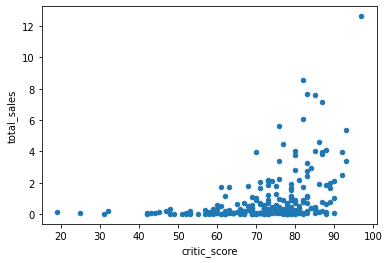

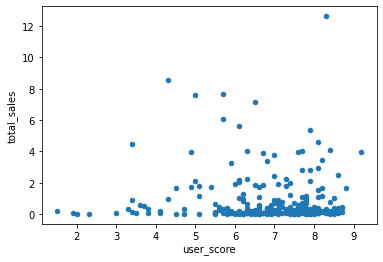

In [48]:
ps4_crit = new_data.query('platform == "PS4"')
ps4_crit[~(ps4_crit['critic_score'].isna())].plot(kind='scatter', x='critic_score', y='total_sales')
ps4_crit[~(ps4_crit['user_score'].isna())].plot(kind='scatter', x='user_score', y='total_sales')
plt.show()



Исключив пропуски, можем посмотреть, как вляют оценки пользователей и критиков на кол-во продаж у игры. Для точного описания, посмотрим на коллеряцию

In [49]:
ps4_crit['critic_score'].corr(ps4_crit['total_sales'])

0.40266141068104083

In [50]:
ps4_crit['user_score'].corr(ps4_crit['total_sales'])

-0.040131589472697356

Оценки пользователей никак не влияет на продажи игр. Оценка критиков влияет очень слабо, незначительно.

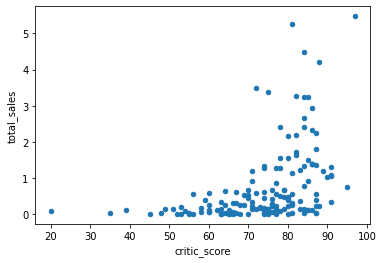

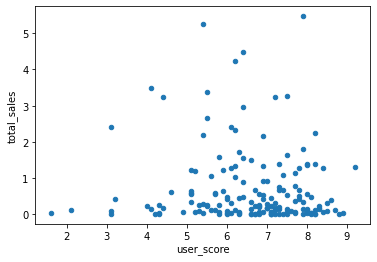

In [51]:
XOne_crit = new_data.query('platform == "XOne"')
XOne_crit[~(XOne_crit['critic_score'].isna())].plot(kind='scatter', x='critic_score', y='total_sales')
XOne_crit[~(XOne_crit['user_score'].isna())].plot(kind='scatter', x='user_score', y='total_sales')
plt.show()

In [52]:
XOne_crit['critic_score'].corr(XOne_crit['total_sales'])

0.42867694370333226

In [53]:
XOne_crit['user_score'].corr(XOne_crit['total_sales'])

-0.0703839280647581

Видим анологичную ситуацию у конкурента, пользовательская оценка не влияет, оценка критиков тоже не имеет влияния на продажи

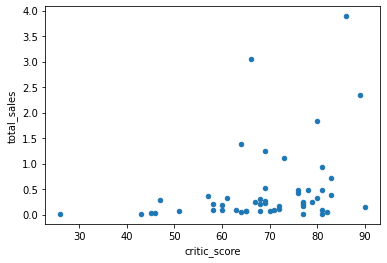

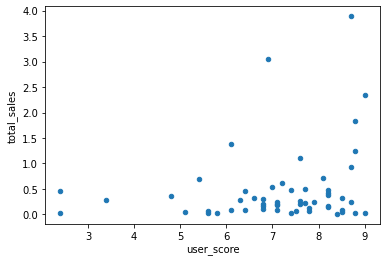

In [54]:
ThDS_crit = new_data.query('platform == "3DS"')
ThDS_crit[~(ThDS_crit['critic_score'].isna())].plot(kind='scatter', x='critic_score', y='total_sales')
ThDS_crit[~(ThDS_crit['user_score'].isna())].plot(kind='scatter', x='user_score', y='total_sales')
plt.show()


In [55]:
ThDS_crit['critic_score'].corr(ThDS_crit['total_sales'])

0.314117492869051

In [56]:
ThDS_crit['user_score'].corr(ThDS_crit['total_sales'])

0.2151932718527028

Значения отличаются, но не изменна сама суть и результат, тут все так же

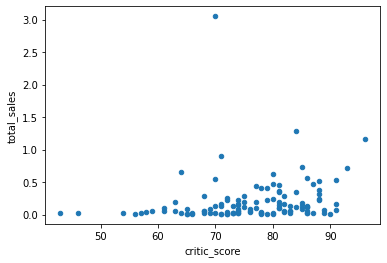

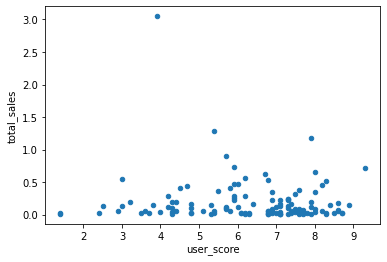

In [57]:
PC_crit = new_data.query('platform == "PC"')
PC_crit[~(PC_crit['critic_score'].isna())].plot(kind='scatter', x='critic_score', y='total_sales')
PC_crit[~(PC_crit['user_score'].isna())].plot(kind='scatter', x='user_score', y='total_sales')
plt.show()

In [58]:
PC_crit['critic_score'].corr(PC_crit['total_sales'])

0.17463413769350036

In [59]:
PC_crit['user_score'].corr(PC_crit['total_sales'])

-0.07159665703472451

и с ПК все так же

**Итог**

В сумме получаем, что на самых популярных платформах ни оценки критиков ни оценки игроков никак не касаются продаж самого продукта. Основные консоли имееют очень слабую связь между оценками критиков и кол-вом продаж

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [60]:
new_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Fighting         28.22
Racing           27.52
Platform         18.09
Adventure        17.55
Simulation       13.13
Strategy          3.96
Puzzle            2.21
Name: total_sales, dtype: float64

In [61]:
new_data.groupby('genre')['total_sales'].count().sort_values(ascending=False)

genre
Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: total_sales, dtype: int64

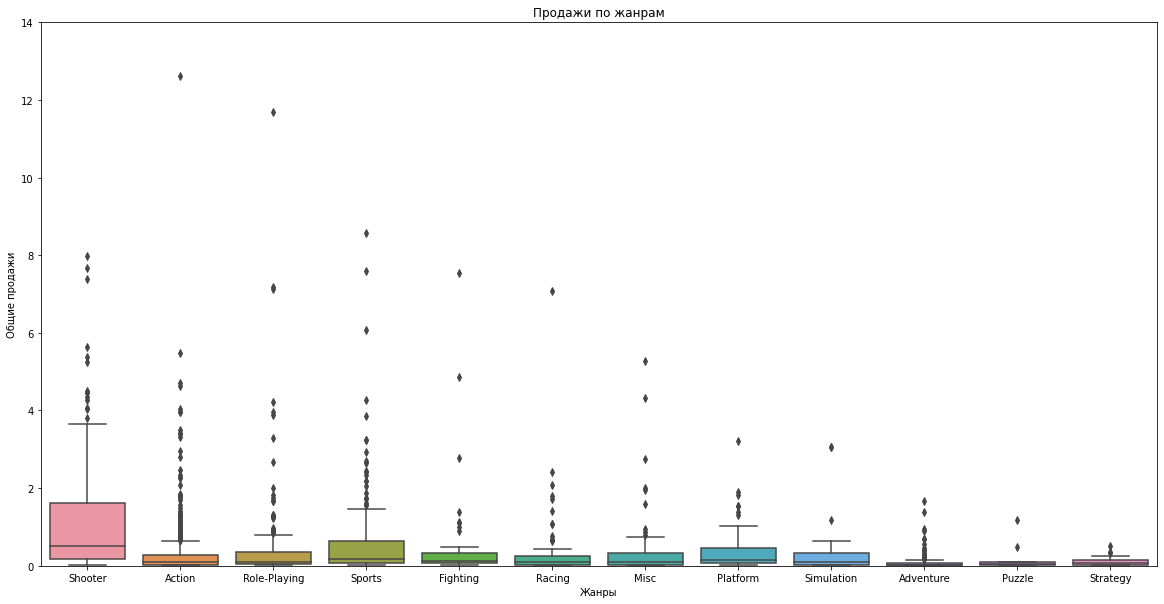

In [62]:
fig = plt.figure(figsize = (20,10))
genre_plot = sb.boxplot(data = new_data, y = 'total_sales', x='genre').set(title = 'Продажи по жанрам', xlabel = 'Жанры', ylabel = 'Общие продажи', ylim=(0, 14))
plt.show()



Увидел ошибку, у экш жанра сильный выборос и по ошибке определил этот жанр как самый продаваемый

Лучше всего продается жанр Shooter и Sports

<h2>Портрет пользователя по региону</h2>

**Жанры**

Посмотрим на любовь к жанрам игр у разные регионов

In [63]:
NA_genre = new_data.groupby(['genre'])['NA_sales'].agg(['sum'])
EU_genre = new_data.groupby(['genre'])['EU_sales'].agg(['sum'])
JP_genre = new_data.groupby(['genre'])['JP_sales'].agg(['sum'])

display(NA_genre.sort_values(ascending=False, by='sum'))
display(EU_genre.sort_values(ascending=False, by='sum'))
JP_genre.sort_values(ascending=False, by='sum')

,sum
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05
Fighting,12.43
Racing,8.74
Platform,6.79
Adventure,5.64


,sum
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13
Misc,12.86
Simulation,7.30
Platform,6.80
Fighting,6.69


,sum
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87
Adventure,3.60
Sports,3.26
Platform,2.69
Simulation,2.31


Вот и топ жанров по регионам. Посмотрим нагляднее

,NA_sales,EU_sales,JP_sales
genre,,,
Action,72.53,74.68,29.58
Adventure,5.64,6.49,3.60
Fighting,12.43,6.69,6.37
Misc,15.05,12.86,5.61
Platform,6.79,6.80,2.69
Puzzle,0.65,0.52,0.93
Racing,8.74,14.13,1.76
Role-Playing,33.47,28.17,31.16
Shooter,79.02,65.52,4.87


Text(0, 0.5, 'Продажи, млн шт')

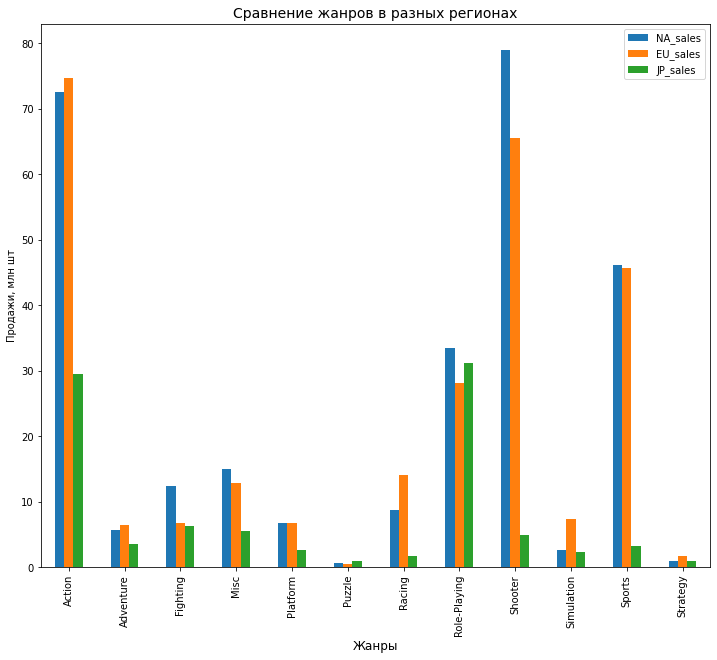

In [64]:
All_reg = pd.merge(NA_genre, EU_genre, left_index=True, right_index=True)
All_reg = All_reg.merge(JP_genre, left_index=True, right_index=True)
All_reg = All_reg.rename(columns={'sum_x': 'NA_sales', 'sum_y': 'EU_sales', 'sum' : 'JP_sales'})
display(All_reg)
All_reg.plot.bar(figsize=(12,10))

plt.title('Сравнение жанров в разных регионах', fontsize=14)
plt.xlabel('Жанры', fontsize=12)
plt.ylabel('Продажи, млн шт',fontsize=10)

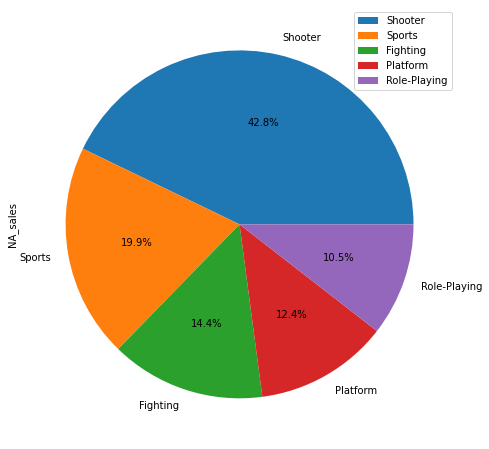

In [65]:
df_NA_top = new_data.groupby('genre').agg({'NA_sales': 'mean'}).sort_values(by='NA_sales', ascending=False).head(5)        
df_NA_top.plot(kind='pie', y='NA_sales', autopct='%1.1f%%', figsize=(8, 8))
plt.show()




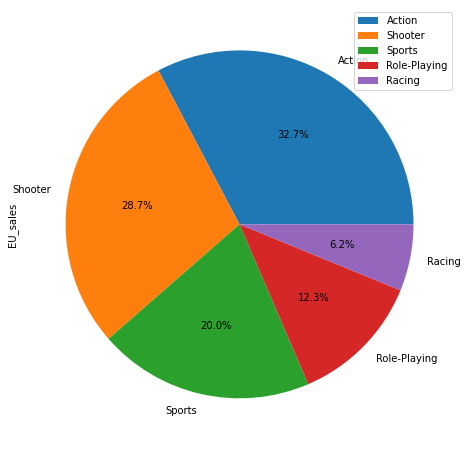

In [66]:
df_EU_top = new_data.groupby('genre').agg({'EU_sales': 'sum'}).sort_values(by='EU_sales', ascending=False).head(5)
df_EU_top.plot(kind='pie', y='EU_sales', autopct='%1.1f%%', figsize=(8, 8))

plt.show()

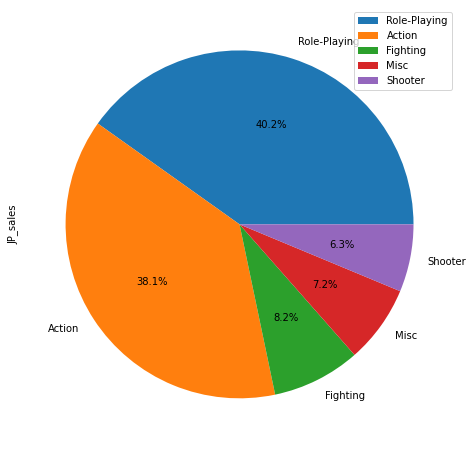

In [65]:
df_JP_top = new_data.groupby('genre').agg({'JP_sales': 'sum'}).sort_values(by='JP_sales', ascending=False).head(5)
df_JP_top.plot(kind='pie', y='JP_sales', autopct='%1.1f%%', figsize=(8, 8))

plt.show()

Собственно, вот и график. Тут отлично видно, как покупаются игры разного жанра:

- Северной Америке ледируют шутеры, ролевки, файтинги и спортивные симуляторы, последний жанр на ровне с европейами.
- В европе Action
- В Японии нет какого-то лидера, но популярны Action и Role-Playing

Если состовлять список сапых популярных жанров, то:

- Северная америка Shooter Action	Sports	Role-Playing  Misc
- Европа Action	Shooter	Sports Role-Playing Racing	
- Япония Role-Playing	Action Fighting Misc Shooter	Adventure

**Платформа**

In [68]:
NA_platform = new_data.groupby(['platform'])['NA_sales'].agg(['sum'])
EU_platform = new_data.groupby(['platform'])['EU_sales'].agg(['sum'])
JP_platform = new_data.groupby(['platform'])['JP_sales'].agg(['sum'])

display(NA_platform.sort_values(ascending=False, by='sum'))
display(EU_platform.sort_values(ascending=False, by='sum'))
JP_platform.sort_values(ascending=False, by='sum')

,sum
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05
WiiU,19.36
PC,7.23
PSV,2.52
Wii,2.08


,sum
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12
X360,15.49
WiiU,13.15
PSV,3.53
Wii,2.59


,sum
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31
PSP,0.36
XOne,0.32
X360,0.08
PC,0.00


,NA_sales,EU_sales,JP_sales
platform,,,
3DS,22.64,16.12,44.24
PC,7.23,17.97,0.00
PS3,22.05,25.54,11.22
PS4,98.61,130.04,15.02
PSP,0.00,0.00,0.36
PSV,2.52,3.53,14.54
Wii,2.08,2.59,0.00
WiiU,19.36,13.15,7.31
X360,28.30,15.49,0.08


Text(0, 0.5, 'Продажи, млн шт')

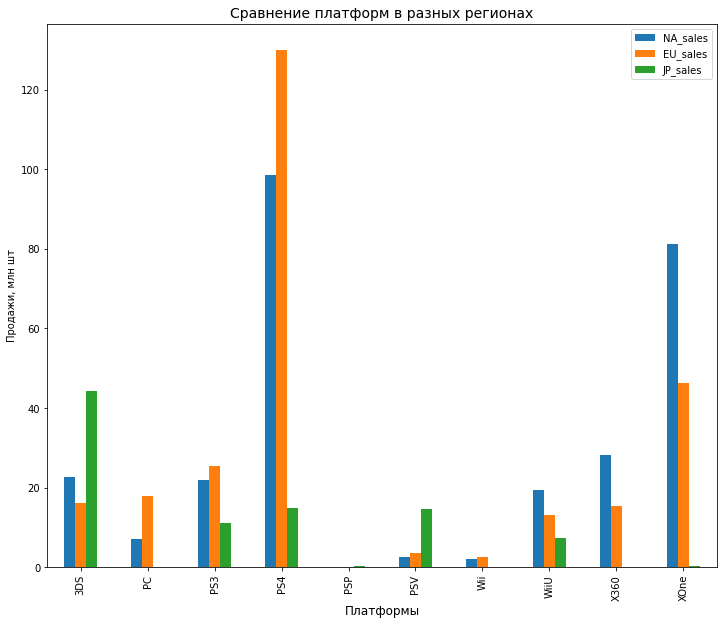

In [69]:
All_reg_pl = pd.merge(NA_platform, EU_platform, left_index=True, right_index=True)
All_reg_pl = All_reg_pl.merge(JP_platform, left_index=True, right_index=True)
All_reg_pl = All_reg_pl.rename(columns={'sum_x': 'NA_sales', 'sum_y': 'EU_sales', 'sum' : 'JP_sales'})
display(All_reg_pl)
All_reg_pl.plot.bar(figsize=(12,10))

plt.title('Сравнение платформ в разных регионах', fontsize=14)
plt.xlabel('Платформы', fontsize=12)
plt.ylabel('Продажи, млн шт',fontsize=10)

Отчетливо видно, что PS4 занимет лидирующее место у европейцов и американцев, у американцев также популярен xbox One, состоавляющий конкуренцию PS4, что касается Японии - фаворит 3DS и PSV с PS4, но в меньших масштабах, но это связано с размером населения в этих регионах

,NA_sales,EU_sales,JP_sales
rating,,,
E,50.74,58.06,8.94
E10+,33.23,26.16,4.46
M,96.42,93.44,8.01
T,38.95,34.07,14.78
Unknown,64.72,58.95,56.90


Text(0, 0.5, 'Продажи, млн шт')

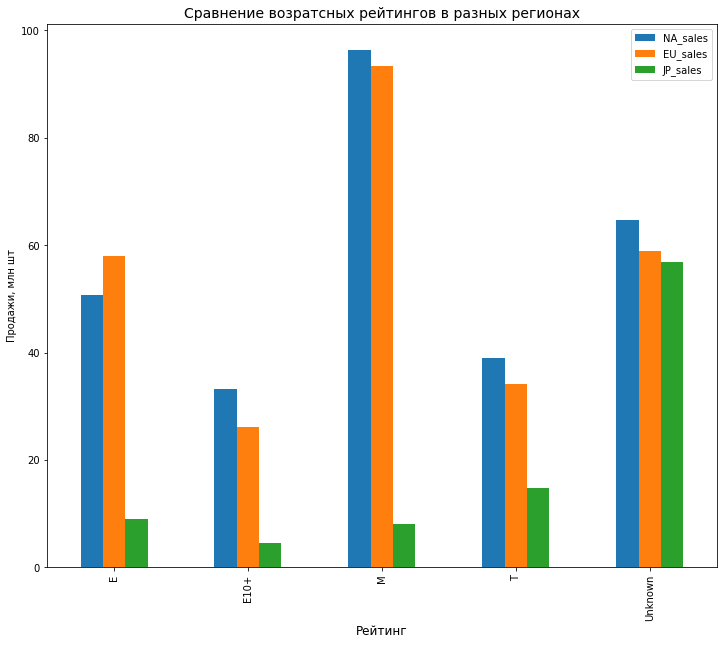

In [68]:
NA_rating = new_data.groupby(['rating'])['NA_sales'].agg(['sum'])
EU_rating = new_data.groupby(['rating'])['EU_sales'].agg(['sum'])
JP_rating = new_data.groupby(['rating'])['JP_sales'].agg(['sum'])


All_reg_ra = pd.merge(NA_rating, EU_rating, left_index=True, right_index=True)
All_reg_ra = All_reg_ra.merge(JP_rating, left_index=True, right_index=True)
All_reg_ra = All_reg_ra.rename(columns={'sum_x': 'NA_sales', 'sum_y': 'EU_sales', 'sum' : 'JP_sales'})
display(All_reg_ra)
All_reg_ra.plot.bar(figsize=(12,10))

plt.title('Сравнение возратсных рейтингов в разных регионах', fontsize=14)
plt.xlabel('Рейтинг', fontsize=12)
plt.ylabel('Продажи, млн шт',fontsize=10)





График показывает:

- Пользователей Северой Америки и Европы предпочитают рейтинг М,  потом идет Unknown.
- Видно, что и в Америке и в Европе игроки отдают одинаковое редпочтение играм как по жанру, так по рейтингу.
- В Японии как всегда ситуация иная. Самыми популярными являются игры с рейтингом Unknown, затем с рейтингом Т, Е, М и Е10

**Итог**


- После проведеных исследований для определения портрета пользователя каждого региона. Могу сказать, что предпочтения игроков Северной Америки и Европы похожи, самыми популярными платформами являются PS4 и XOne, а любимые жанры игр - Shooter и Action, игры с рейтингом М и Unknown. Стоит уделить повышенное внимание этим регионам.


- Пользователи Японии существенно отличаются, топ платформа - 3DS, любимые жанры - Role-Playing и Action и игры с рейтингом Unknown.

<h2>Гипотезы</h2>

<h3>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые</h3>

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Нулевая гипотеза всегда гласит о равенсве между двумя средними, тк из задания:
- Проверьте гипотезы Средние пользовательские рейтинги платформ Xbox One и PC одинаковые, следует, что нас не интересует отличие в большую или меньшую сторону, альт гипотеза будет двухсторонней 

In [71]:
new_data = new_data[~(new_data['user_score'].isna())]
results = st.ttest_ind(new_data.query('platform == "XOne"')['user_score'], new_data.query('platform == "PC"')['user_score'])

alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Выходит, мы не можем отвергнуть гипотезу, значит, у нас нет основании пологать, что оценки на двух данных платформах сильно отличаются

<h3>Средние пользовательские рейтинги жанров Action и Sports разные</h3>
Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports различаются.

Нулевая гипотеза всегда связана с равенством двух средних. Из самого задания следует, что нам нужно проверить это равенство, знаичт альт гипотеза будет двухсторонней, интересует равны или нет, не более

In [72]:
results = st.ttest_ind(new_data.query('genre == "Action"')['user_score'], new_data.query('genre == "Sports"')['user_score'])

alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Исходя их результата, могу сказать, что оснований пологать, чо оценки у двух данных жанров одинаковые нет

<h2>Вывод</h2>

- С 2000 года виден рост выпуска игр, затем еще один скачок до 20010г, после чего спад до 2016г.
- Платформы с наибольшими суммарными продажами, PS2, X360, PS3, Wii, DS, PS. Если рассматривать данные с 2014 года, что следует делать для прогнозов на 2017, то там лидеры -PS4, XboxOne, 3DS.
- Как было сказано выше, для проноза я бы брал последние 3 года из таблицы
- По графику видно, что популярность идет вверх у PS4, WiiU и XOne, у них практический одинаковая медиана продаж 
- Оценки игроков никак не влияют на итоговые продажи игры, оценки критиков для некоторым платформ(PS4, XOne) очень слабы влияют, в остальном они не влияют
- Япония отличается любовью к жанру, если в Америке и европе любят шутеры и экш, но в Японии отдают предпочтений ролевке.
- Не смотря на это, самые большие сборы у экш игр и шутеров
- Во время анализа пришлось проверить 2 гипотезы, о равенсве пользовательских одценок у PC и XOne, гипоетеза не отвергнута и о значимых отличии пользовательских оценок у экш и спортивных игр, гипотеза отвергнута.